<a href="https://colab.research.google.com/github/TacticalCoders/machine-learning/blob/main/ProbablityOfFishSpecies2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **확률적 경사 하강법**



## 점진적인 학습

럭키박스에 **새로운 생선의 종류가 추가** 된다면 모델을 다시 훈련시켜야 할 것이다.

문제는 (새로운 생선의) 훈련 데이터가 한 번에 준비되는 것이 아니라 조금씩 전달되는 상황이라면 어떻게 해야할까? 데이터가 충분히 쌓일 때까지 기다린다음 학습시켜야 할까?

그것보다는 기존의 훈련 데이터에 새로운 데이터를 추가하여 모델을 계속해서 훈련시킬 수 있을 것이다. 하지만 그렇게 데이터가 계속 쌓이다보면 서버 용량을 늘려야 하는 시점이 올 것이다. 따라서 이런 방식은 지속가능한 방식이라고 보기 어렵다.

그럼 새로운 데이터를 추가할 때, 이전 데이터를 버리면되지 않을까? 하지만 중요한 데이터를 버리면 오히려 성능이 저하되는 문제가 발생할 수 있다. 그리고 이는 기존의 모델을 아예 버리고 새 모델을 만드는 것이기에 생산성이 좋다고 보기 힘들다.

그래서 등장한 것이 **점진적 학습** (온라인 학습)이다. 즉, 기존의 모델을 버리지 않고 새로운 데이터에 대해서 조금씩 더 훈련하는 것이다.

대표적인 점진적 학습 알고리즘은 **확률적 경사 하강법(Stochastic Gradient Descent)**이다.

## **확률적 경사 하강법**

우선 여기서 **확률적**이라는 말은 **무작위하게** 즉 **랜덤하게** 라는 뜻이다.

경사는 기울기를 뜻하고, 하강법은 내려가는 방법이다. 따라서 경사 하강법은 **기울기를 따라 내려가는 방법**이다.

이해를 위해 산에서 내려오는 상황을 생각해보자. 가장 빠른 길은 가장 경사가 가파른 길이다. 그렇지만 하산 할때는 천천히 조금씩 내려와야 한다. 한 번에 너무 큰 걸음을 내딛게 되면 다른 산 중턱에 걸리는일이 생길 수 있다는 것이다.

경사 하강법에서도 가장 가파른 길을 천천히 조금씩 내려오는 방식으로 학습한다.

그럼 가장 가파른 길을 어떻게 찾을 수 있을까? 

훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려간다. 가 다음 또 랜덤하게 또 다른  샘플을 선택하여 가파른 경사를 조금 내려간다. 이런 식으로 전체 샘플을 모두 사용할 때까지 계속한다.

그래도 산을 다 내려오지 못했다면 다시 처음부터 시작한다. 훈련 세트에 모든 샘플을 다시 채워 넣고 그다음 랜덤하게 하나의 샘플을 선택해 경사를 내려간다. 만족할만한 위치에 도달할 때까지 계속 반복한다. 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하느 과정을 **에포크(epoch)**라고 하는데 일반적으로 경사 하강법은 **수십, 수백 번 이상 에포크를 수행한다**.

하지만 랜덤하게 1개의 샘플만을 뽑을 수도 있지만 **여러 개**를 뽑을 수도 있다. 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식을 **미니배치 경사 하강법(minibatch gradient descent)**라고 한다.

극단적으로 한 번 경사로를 따라 이동하기 위해 **전체 샘플**을 사용할 수 있는데, 이를 **배치 경사 하강법(batch gradient descent)**라고 부른다. 전체 데이터를 사용하기 때문에 가장 안정정이지만 컴퓨터 자원을 너무 많이 사용하게 될 수 있다는 단점이 있다.


### 확률적 경사 하강법과 **신경망 알고리즘**

신경망 알고리즘은 일반적으로 많은 데이터를 사용하기 때문에 한 번에 모든 데이터를 사용하기 어렵다. 또 모델이 매우 복잡해 수학적인 방법으로 해답을 얻기도 어렵다. 따라서 **신경망 모델은 확률적 경사 하강법이나 미니배치 경사 하강법을 꼭 사용한다.**

### **손실함수(loss function)**

지금까지 산이라고 불러왔지만 실제로 모델이 빠른 길을 찾아 내려가려고 하는 것은 무엇일까? 바로 **손실함수**이다. 

손실함수는 어떤 문제에서 ***머신러닝 알고리즘이 얼마나 엉터리인지***를 측정하는 기준이다. (값이 작을수록 좋다.)

문제는 **어떤 값이 최솟값인지 알지 못하**므로 가능한 많이 찾아보고 만족할만한 수준이라면 산을 다 내려왔다고 인정해야 한다.

손실함수는 미분가능해야 한다. 그러므로 손실함수는 연속적인 함수다. 

#### **로지스틱 손실 함수(logistic loss function)**

맨 처음 만든 도미와 빙어 이진 분류 모델의 손실함수를 구해보자.

도미는 1이고, 빙어는 0이다.(양성클래스, 음성클래스)

모델이 1 0 0 1로 예측했고, 각각의 0.9, 0.3, 0.2, 0.8의 확률로 예측했다고 가정한다.

In [1]:
-(0.9 * 1) # 1은 타깃(정답)

-0.9

In [2]:
-(0.3 * 1) 

-0.3

In [3]:
# 음성클래스는 확률과 타깃모두 1에서 뺀 값으로 계산한다. #모두 0으로 만들어버리기 때문.
-(0.8 * 1) # 원래는 0.2 * 0 

-0.8

In [4]:
-(0.2 * 1) # 원래는 0.8 * 0

-0.2

이처럼 예측 확률을 활용하여 연속적인 손실 함수를 얻을 수 있다.

여기서 예측 확률에 로그 함수를 적용하면 좋다. 예측 확률의 범위는 0~1이다. 로그 함수는 0과 1사이에서 음수이므로 음수 * 음수가 되어 최종 손실값을 양수로 볼 수 있게 된다. 

이 손실 함수를 로지스틱 손실 함수라고하고 다른 말로 **이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)**라고도 한다.

다중 분류에서도 비슷한 손실 함수를 사용하는데 다중 분류에서 사용하는 손실 함수를 크로스엔트로피 손실 함수**(cross-entropy loss function)**라고 한다.

이런 손실함수들이 이미 개발되어 있어 직접 손실 함수를 만들일은 거의 없다.

## 데이터 준비하기

In [6]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [7]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [8]:
fish_input = fish[['Weight', 'Length', 'Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [11]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [12]:
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [13]:
# 훈련 세트와 테스트 세트 나누기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [17]:
# 특성 표준화 전처리 하기 - 훈련 세트에서 학습한 통계 값으로 테스트 세트도 변환해야 함

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 훈련하기

### SGDClassifier

사이킷런에서 확률적 경사 하강법을 제공한는 대표적인 분류용 클래스이다. 이를 활용하여 훈련시켜보자.

In [15]:
from sklearn.linear_model import SGDClassifier

In [20]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) #loss는 손실 함수 지정, max_iter는 수행할 에포크 횟수.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


ConvergenceWarning은 모델이 충분히 수렴하지 않았다는 경고이다. 

또 훈련 세트와 테스트 세트의 정확도가 낮다. 

따라서 max_iter의 값을 늘려 주는 것이 좋겠다.

모델을 이어서 훈련할 때는 **partial_fit()메서드**를 사용한다. (1 에포크씩)

In [21]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


조금 향상되었다. 그런데 얼만큼 더 훈련해야 할까? 무지성으로 반복하기 전에 기준을 찾아보자.

### 적절한 에포크 횟수 찾기 - **조기 종료(ealry stopping)**

#### 에포크와 과대/과소적합

에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습한다. 산을 내려오지 못하고 훈련을 마친 것. 

반대로 횟수가 충분히 많으면 훈련 세트를 완전히 학습할 것이다. 훈련 세트에 아주 잘 맞는 모델이 만들어진다.

따라서 **적은 에포크 횟수**는 훈련 세트와 테스트 세트 모두에 잘 맞지 않는 **과소적합**일 가능성이 높고, **많은 에포크 회수**는 너무 잘맞아 테스트세트에서는 오히려 점수가 나쁜 **과대적합**인 모델일 가능성도 높다.

실제로 에포크가 진행됨에 따라 훈련 세트점수는 꾸준히 증가하지만 어느 시점부터 테스트 세트 점수는 감소한다. 바로 이 지점이 과대적합되기 시작하는 곳이다. 

따라서 과대적합이 시작하기 전에 훈련을 멈춰야 하는데, 이를 **조기 종료(early stoppting)**이라 한다.

그럼 직접 그래프를 그려 조기 종료 지점을 찾아보자.

In [23]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target) # 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit에 넘겨주기 위해

In [25]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

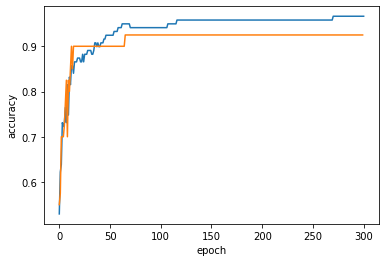

In [28]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

파란색이 훈련 세트 그래프, 주황색이 테스트 세트 그래프이다.

에포크 초기에는 훈련 세트, 테스트 세트 모두 과소접합 된 것을 확인할 수 있다.
100번째 에포크 이후부터 점점 훈련 세트와 테스트 세트의 점수가 벌어지고 있다. 

따라서 100의 에포크 횟수가 적절해보인다.

### 적절한 에포크로 훈련하기

In [31]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 훈련을 자동으로 멈춘다. 

그래서 tol 매개변수에 향상될 최솟값을 지정한다. 하지만 위에서는 tol 매개변수를 None으로 지정하여 멈추지 않고 무조건 100번 반복되게 하였다.

점수가 꽤 좋다.

### 힌지 손실(hinge loss)로 훈련하기

SGDClassifier는 로지스틱 손실 함수 외에도 여러 종류의 손실 함수를 지원한다.

그 중 하나가 힌지 손실이다. 힌지 손실은 서포트 벡터 머신(support vector machine)이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실함수라고 한다.

한 번 이를 활용해서 훈련시켜보자.

힌지 손실 함수는 loss에 'hinge'로 지정하면 된다.

In [34]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


In [35]:
sc.predict([[240 ,25 , 30 ,12 ,4]])

array(['Pike'], dtype='<U9')